In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import plotly.io as pio
import json
import plotnine
from plotnine import ggplot, aes, geom_boxplot

In [92]:
data = pd.read_csv('Baselstadt Wohnviertel.csv', sep=';')

### Raw Data
Der Datensatz, mit welchem die Visualisierungen gemacht habe, stammt von Swissopendata des Kantons Baselstadt. Der Datensatz ist schon sehr gut strukturiert. Einige Titel wurden zum vereinfachten Verständnis geändert.

In [93]:
data.head()

,Jahr,Wohnviertel_id,Wohnviertel in Basel,Sozialhilfeempfänger,Anteil Ausländer,Anteil Personen ohne Religionszugehörigkeit,Anteil Personen in Einzenhaushalten,Gymnasialquote,Altersquotient,Anteil Sesshafte,...,Baujahr der Wohngebäude,Anteil Einfamilienhäuser,Anteil Grünflächen,Fläche pro Wohnung,Wohnfläche pro Person,Vermögenssteuer pro Veranlagung,Einkommenssteuer pro Veranlagung,Erwerbstätigenquote,Arbeitsplätze pro Einwohner,Arbeitslosenquote
0,2015,1,Altstadt Grossbasel,0.017115,0.251426,0.517930,0.324463,0.777778,0.297921,0.328851,...,1825.400406,0.101626,0.066693,90.808059,55.739958,4297.479726,15795.731129,0.824263,4.354447,0.019072
1,2015,2,Vorstädte,0.031635,0.353328,0.532251,0.345813,0.636364,0.374726,0.279170,...,1899.097967,0.075786,0.194198,81.803421,51.200218,4902.317140,14894.945946,0.779869,4.530718,0.023471
2,2015,7,Bruderholz,0.017662,0.229827,0.458660,0.166817,0.608108,0.442465,0.427310,...,1948.410577,0.734615,0.713769,109.383218,50.067809,8585.686671,18103.101406,0.752834,0.130144,0.023127
3,2015,8,Bachletten,0.022092,0.210320,0.455482,0.224974,0.609137,0.374629,0.421825,...,1934.025590,0.561775,0.408619,93.179580,47.396467,1632.650810,11363.577884,0.790006,0.190061,0.023636
4,2015,10,Iselin,0.089462,0.360277,0.445545,0.284152,0.262357,0.260469,0.331530,...,1937.165632,0.167702,0.375125,68.638626,37.648552,425.867934,6405.308048,0.701177,0.155020,0.042679


In [94]:
data.describe()

,Jahr,Wohnviertel_id,Sozialhilfeempfänger,Anteil Ausländer,Anteil Personen ohne Religionszugehörigkeit,Anteil Personen in Einzenhaushalten,Gymnasialquote,Altersquotient,Anteil Sesshafte,Jugendquotient,Baujahr der Wohngebäude,Anteil Einfamilienhäuser,Anteil Grünflächen,Fläche pro Wohnung,Wohnfläche pro Person,Vermögenssteuer pro Veranlagung,Einkommenssteuer pro Veranlagung,Erwerbstätigenquote,Arbeitsplätze pro Einwohner,Arbeitslosenquote
count,147.000000,147.000000,147.000000,147.000000,105.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,105.000000
mean,2018.000000,11.428571,0.060748,0.361018,0.476142,0.244319,0.417547,0.317615,0.340766,0.255315,1928.312788,0.282089,0.326933,81.171372,42.129206,2882.230663,10230.951813,0.731797,1.105145,0.039850
std,2.006838,7.017590,0.036894,0.099315,0.042941,0.056225,0.172538,0.094738,0.055963,0.068693,29.452463,0.249526,0.231778,15.068770,6.609644,4074.211065,4650.324399,0.052457,1.246632,0.015600
min,2015.000000,1.000000,0.011543,0.210320,0.380690,0.111311,0.092105,0.118377,0.188677,0.118938,1822.577778,0.019231,0.066659,65.324837,31.680970,162.197733,4303.548817,0.608544,0.117887,0.015258
25%,2016.000000,6.000000,0.032337,0.274783,0.452016,0.210683,0.270032,0.249084,0.306513,0.208373,1925.140737,0.076923,0.159621,70.062692,36.615062,482.588954,6489.333814,0.703900,0.192092,0.025148
50%,2018.000000,11.000000,0.048733,0.356314,0.474406,0.247441,0.370370,0.324102,0.335110,0.254046,1934.173792,0.166552,0.273127,74.558432,41.631673,1123.294805,8591.745140,0.736676,0.631011,0.039207
75%,2020.000000,16.000000,0.088239,0.434390,0.499520,0.281817,0.566129,0.374678,0.376344,0.300073,1942.223713,0.369145,0.369919,90.310592,47.647944,3729.412739,13427.463938,0.764322,1.654509,0.050459
max,2021.000000,30.000000,0.143104,0.559136,0.571370,0.360265,0.823529,0.491479,0.433809,0.401229,1962.493506,0.794212,0.903448,121.406504,55.739958,20903.358745,22686.809221,0.856377,4.603416,0.071965


In [95]:
data.describe()

,Jahr,Wohnviertel_id,Sozialhilfeempfänger,Anteil Ausländer,Anteil Personen ohne Religionszugehörigkeit,Anteil Personen in Einzenhaushalten,Gymnasialquote,Altersquotient,Anteil Sesshafte,Jugendquotient,Baujahr der Wohngebäude,Anteil Einfamilienhäuser,Anteil Grünflächen,Fläche pro Wohnung,Wohnfläche pro Person,Vermögenssteuer pro Veranlagung,Einkommenssteuer pro Veranlagung,Erwerbstätigenquote,Arbeitsplätze pro Einwohner,Arbeitslosenquote
count,147.000000,147.000000,147.000000,147.000000,105.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,105.000000
mean,2018.000000,11.428571,0.060748,0.361018,0.476142,0.244319,0.417547,0.317615,0.340766,0.255315,1928.312788,0.282089,0.326933,81.171372,42.129206,2882.230663,10230.951813,0.731797,1.105145,0.039850
std,2.006838,7.017590,0.036894,0.099315,0.042941,0.056225,0.172538,0.094738,0.055963,0.068693,29.452463,0.249526,0.231778,15.068770,6.609644,4074.211065,4650.324399,0.052457,1.246632,0.015600
min,2015.000000,1.000000,0.011543,0.210320,0.380690,0.111311,0.092105,0.118377,0.188677,0.118938,1822.577778,0.019231,0.066659,65.324837,31.680970,162.197733,4303.548817,0.608544,0.117887,0.015258
25%,2016.000000,6.000000,0.032337,0.274783,0.452016,0.210683,0.270032,0.249084,0.306513,0.208373,1925.140737,0.076923,0.159621,70.062692,36.615062,482.588954,6489.333814,0.703900,0.192092,0.025148
50%,2018.000000,11.000000,0.048733,0.356314,0.474406,0.247441,0.370370,0.324102,0.335110,0.254046,1934.173792,0.166552,0.273127,74.558432,41.631673,1123.294805,8591.745140,0.736676,0.631011,0.039207
75%,2020.000000,16.000000,0.088239,0.434390,0.499520,0.281817,0.566129,0.374678,0.376344,0.300073,1942.223713,0.369145,0.369919,90.310592,47.647944,3729.412739,13427.463938,0.764322,1.654509,0.050459
max,2021.000000,30.000000,0.143104,0.559136,0.571370,0.360265,0.823529,0.491479,0.433809,0.401229,1962.493506,0.794212,0.903448,121.406504,55.739958,20903.358745,22686.809221,0.856377,4.603416,0.071965


In [96]:
df1 = data[data.Jahr == 2021].copy()
df = df1.sort_values(by= ['Sozialhilfeempfänger'])
df.head()

,Jahr,Wohnviertel_id,Wohnviertel in Basel,Sozialhilfeempfänger,Anteil Ausländer,Anteil Personen ohne Religionszugehörigkeit,Anteil Personen in Einzenhaushalten,Gymnasialquote,Altersquotient,Anteil Sesshafte,...,Baujahr der Wohngebäude,Anteil Einfamilienhäuser,Anteil Grünflächen,Fläche pro Wohnung,Wohnfläche pro Person,Vermögenssteuer pro Veranlagung,Einkommenssteuer pro Veranlagung,Erwerbstätigenquote,Arbeitsplätze pro Einwohner,Arbeitslosenquote
142,2021,1,Altstadt Grossbasel,0.012505,0.295567,NaN,0.308090,0.437500,0.281538,0.301887,...,1822.996032,0.103175,0.066659,87.251775,52.433208,5871.5,16745.3,0.844536,4.024307,NaN
16,2021,30,Bettingen,0.015190,0.252321,NaN,0.124545,0.375000,0.440909,0.427004,...,1962.493506,0.788961,0.902122,120.795635,52.640000,14573.8,20650.0,0.738468,0.261817,NaN
144,2021,7,Bruderholz,0.018736,0.250450,NaN,0.147925,0.690323,0.412363,0.429978,...,1949.472355,0.729743,0.712127,109.572898,48.398167,9469.7,17603.7,0.740260,0.135812,NaN
99,2021,8,Bachletten,0.023106,0.224846,NaN,0.211436,0.564356,0.360282,0.414595,...,1934.427545,0.558084,0.413414,92.740655,46.225749,2334.9,12010.6,0.758356,0.198983,NaN
15,2021,14,Wettstein,0.027888,0.334142,NaN,0.272121,0.489362,0.283238,0.347306,...,1933.525352,0.332394,0.280554,82.962820,45.797261,1453.9,11712.6,0.789864,1.879221,NaN


### Data Explanation
Für die meisten Visualisierungen wurde mit den Daten aus dem Jahr 2021 gearbeitet. Da sich die Sozialempfänger Rate über die Jahre bei einigen Quartieren stark veränderte (vor allem in den letzten Jahren mit dem Corona-Virus), würde der Durchschnitt kein aktuelles Bild widerspiegeln. Dafür musste man einige fehlende Daten wie die Religionsangehörigkeit und die Arbeitslosenquote in Kauf nehmen. 

In [97]:
df1 = data[data.Wohnviertel_id == 18].copy()
df_longtime = data.sort_values(by= ['Sozialhilfeempfänger'])
df_longtime

,Jahr,Wohnviertel_id,Wohnviertel in Basel,Sozialhilfeempfänger,Anteil Ausländer,Anteil Personen ohne Religionszugehörigkeit,Anteil Personen in Einzenhaushalten,Gymnasialquote,Altersquotient,Anteil Sesshafte,...,Baujahr der Wohngebäude,Anteil Einfamilienhäuser,Anteil Grünflächen,Fläche pro Wohnung,Wohnfläche pro Person,Vermögenssteuer pro Veranlagung,Einkommenssteuer pro Veranlagung,Erwerbstätigenquote,Arbeitsplätze pro Einwohner,Arbeitslosenquote
42,2019,1,Altstadt Grossbasel,0.011543,0.280877,0.522509,0.297761,0.615385,0.289839,0.315043,...,1823.160000,0.102000,0.067259,89.764261,53.158122,5639.563246,16990.146778,0.856377,4.107745,0.025747
88,2020,1,Altstadt Grossbasel,0.012147,0.282132,NaN,0.297441,0.411765,0.296884,0.315471,...,1822.761431,0.103380,0.066659,89.593644,52.648479,5758.965171,16423.081464,0.837441,3.998352,NaN
142,2021,1,Altstadt Grossbasel,0.012505,0.295567,NaN,0.308090,0.437500,0.281538,0.301887,...,1822.996032,0.103175,0.066659,87.251775,52.433208,5871.500000,16745.300000,0.844536,4.024307,NaN
36,2017,30,Bettingen,0.012605,0.247899,0.457143,0.126394,0.600000,0.423581,0.426050,...,1961.971061,0.794212,0.902449,121.344064,52.380952,3214.228707,14099.867508,0.742600,0.284058,0.019386
28,2016,30,Bettingen,0.013289,0.251661,0.440199,0.123853,0.764706,0.420749,0.411960,...,1961.971061,0.794212,0.902597,121.240964,52.376959,2844.771160,13690.040752,0.738645,0.295300,0.019386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,2016,19,Kleinhüningen,0.135862,0.463793,0.380690,0.185556,0.125000,0.282178,0.348276,...,1946.271084,0.156627,0.155594,70.403690,32.466906,207.746101,5162.502183,0.637242,1.870846,0.062309
35,2017,18,Klybeck,0.136212,0.516662,0.418078,0.220706,0.137931,0.205858,0.341988,...,1937.022936,0.073394,0.118182,65.508153,31.775279,176.092070,4410.119065,0.608544,0.819969,0.071659
87,2019,18,Klybeck,0.137392,0.522007,0.417935,0.219658,0.164062,0.208692,0.344851,...,1937.347826,0.070938,0.119975,65.501328,31.766005,182.962079,4335.449021,0.614735,0.479285,0.071965
116,2018,18,Klybeck,0.139490,0.523501,0.412130,0.217713,0.208333,0.203421,0.341971,...,1936.981609,0.071264,0.119319,65.419002,31.680970,185.900318,4462.040068,0.614735,0.795416,0.071965


In [98]:
#Quartiere mit Sozialhilfeempfänger-Quote > 10%
klybeck = data[data.Sozialhilfeempfänger >= 0.1].copy()
klybeck = klybeck.sort_values(by= ['Jahr'])

In [99]:
#Geodaten für Geo-Map
wohnquartiere = json.load(open('100042.geojson', 'r'))
wohnviertel_map = {}
for feature in wohnquartiere['features']:
    feature['id'] = feature['properties']['wov_label']
    wohnviertel_map[feature['properties']['wov_name']] = feature['id']
wohnviertel_map


{'Breite': '4',
 'Gundeldingen': '6',
 'Bachletten': '8',
 'St. Johann': '11',
 'Altstadt Kleinbasel': '12',
 'Vorstädte': '2',
 'Am Ring': '3',
 'Clara': '13',
 'Hirzbrunnen': '15',
 'Rosental': '16',
 'Matthäus': '17',
 'Riehen': '20',
 'Bettingen': '30',
 'Altstadt Grossbasel': '1',
 'St. Alban': '5',
 'Bruderholz': '7',
 'Gotthelf': '9',
 'Iselin': '10',
 'Wettstein': '14',
 'Klybeck': '18',
 'Kleinhüningen': '19'}

In [100]:
#Die drei Quartiere mit der höchsten Sozialhilfeempfänger-Quote
df_top3 = klybeck[(klybeck.Wohnviertel_id == 17) | (klybeck.Wohnviertel_id == 18) | (klybeck.Wohnviertel_id == 19)]
df_top3 = df_top3.sort_values(by = ['Jahr'])
df_top3

,Jahr,Wohnviertel_id,Wohnviertel in Basel,Sozialhilfeempfänger,Anteil Ausländer,Anteil Personen ohne Religionszugehörigkeit,Anteil Personen in Einzenhaushalten,Gymnasialquote,Altersquotient,Anteil Sesshafte,...,Baujahr der Wohngebäude,Anteil Einfamilienhäuser,Anteil Grünflächen,Fläche pro Wohnung,Wohnfläche pro Person,Vermögenssteuer pro Veranlagung,Einkommenssteuer pro Veranlagung,Erwerbstätigenquote,Arbeitsplätze pro Einwohner,Arbeitslosenquote
18,2015,18,Klybeck,0.129559,0.514562,0.413854,0.218927,0.184000,0.206381,0.330430,...,1936.995392,0.073733,0.113490,65.612053,31.787298,175.265051,4633.476995,0.612358,0.950975,0.070434
19,2015,19,Kleinhüningen,0.133171,0.456885,0.383171,0.188965,0.170213,0.279736,0.335883,...,1946.271084,0.156627,0.095810,70.502959,32.888446,192.433640,4771.427727,0.660175,1.652422,0.057516
131,2015,17,Matthäus,0.127677,0.516121,0.446714,0.241082,0.216346,0.165117,0.282304,...,1924.815303,0.071240,0.167294,67.381837,34.554332,419.033825,6202.489730,0.675245,0.188245,0.051271
135,2016,17,Matthäus,0.123114,0.511440,0.452016,0.241777,0.208122,0.168893,0.287720,...,1924.935909,0.071115,0.165313,67.272075,34.462789,426.099847,6286.644855,0.674688,0.189585,0.050653
26,2016,18,Klybeck,0.126219,0.517786,0.411757,0.216548,0.165217,0.201423,0.341437,...,1936.970115,0.073563,0.117614,65.596242,31.850267,162.197733,4486.007958,0.608696,0.846076,0.068903
67,2016,19,Kleinhüningen,0.135862,0.463793,0.380690,0.185556,0.125000,0.282178,0.348276,...,1946.271084,0.156627,0.155594,70.403690,32.466906,207.746101,5162.502183,0.637242,1.870846,0.062309
35,2017,18,Klybeck,0.136212,0.516662,0.418078,0.220706,0.137931,0.205858,0.341988,...,1937.022936,0.073394,0.118182,65.508153,31.775279,176.092070,4410.119065,0.608544,0.819969,0.071659
108,2017,19,Kleinhüningen,0.143104,0.469063,0.391289,0.186939,0.222222,0.280663,0.351538,...,1946.401198,0.155689,0.155087,70.636765,32.593660,171.105751,4839.142857,0.632004,2.045745,0.063107
107,2017,17,Matthäus,0.120088,0.506215,0.462021,0.244891,0.256983,0.172547,0.290898,...,1925.162281,0.071930,0.165775,67.282380,34.715461,474.928142,6265.424484,0.676677,0.176692,0.055471
115,2018,17,Matthäus,0.117195,0.505702,0.464999,0.243332,0.298343,0.177184,0.298217,...,1925.119194,0.070990,0.165724,67.244349,34.833732,491.566063,6313.323906,0.681281,0.183437,0.055595


In [101]:
#Quartier Matthäus
matthäus = df_top3[(df_top3.Wohnviertel_id == 17)]

## LE1 

In [102]:
px.line(klybeck, x = 'Jahr', y= 'Sozialhilfeempfänger', color= 'Wohnviertel in Basel', title= 'Historie Sozialhilfeempfänger > 10%')

In [103]:
long_data = data[data.Jahr >= 2015]
long_data = long_data.sort_values(by= ['Jahr'])
px.line(long_data, x = 'Jahr', y= 'Sozialhilfeempfänger', color= 'Wohnviertel in Basel', title= 'Historie Sozialhilfeempfänger', width= 1000, height= 700, template='ggplot2')

In [104]:
pie = px.pie(df, names= 'Wohnviertel in Basel', values= 'Sozialhilfeempfänger', width= 600, height=600, title= 'Verteilung Sozialhilfeempfänger 2021' )
pie

In [105]:
bar_diagramm = px.bar(df, x= 'Wohnviertel in Basel', y = 'Sozialhilfeempfänger', width= 600, height=600, title= 'Verteilung Sozialhilfeempfänger 2021' )
bar_diagramm

## LE2

In [127]:
bar = px.bar(df, x='Wohnviertel in Basel', y='Sozialhilfeempfänger', color='Gymnasialquote',template='ggplot2', title= 'Sozialhilfeempfänger abhängig von Gymnasialquote', width=800)
bar

In [107]:
box2 = px.bar(df, y="Wohnviertel in Basel", x="Sozialhilfeempfänger", color="Anteil Ausländer", orientation="h", template='plotly',
             title="Sozialhilfeempfänger nach Ausländeranteil 2021", width= 800
            )

box2.show()

In [108]:
scatter = px.scatter(df, x="Anteil Ausländer", y="Sozialhilfeempfänger",
           size='Vermögenssteuer pro Veranlagung',
           color='Wohnviertel in Basel',
           width = 700,
           height= 600,
           title= 'Vermögenssteuer pro Veranlagung',
           template = 'ggplot2'
          )
#scatter. update_layout(legend='Vermögenssteuer pro Veranlagung')
scatter

### Geomap
Um einen Geomap-Plot zu erstellen müssen zuerst die Geodaten der einzelnen Quartiere aufbereitet werden. in den Keys sehen wir, dass alle Informationen, welche benötigt werden vorhanden sind. Es muss lediglich eine Tabelle mit key-Id und den Namen erstellt werden, um die Tabelle df mit den wohnquartieren zu verknüpfen.

In [109]:
wohnquartiere['features'][0]['properties'].keys()

dict_keys(['geo_point_2d', 'wov_id', 'wov_label', 'wov_name', 'gemeinde_name'])

In [110]:
fig = px.choropleth(df, geojson=wohnquartiere, locations='Wohnviertel_id', color='Wohnfläche pro Person',
                           color_continuous_scale="Viridis",
                           scope="europe", hover_name="Wohnviertel in Basel",
                           labels=[{'Sozialhilfeempfänger':'Anteil Sozialhilfeempfänger'}]
                          )
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

In [111]:
# Anzahl Quartieren in unterschiedlichen Kategoreien

mask = (df["Sozialhilfeempfänger"] < 0.02)
df.loc[mask, "Sozialhilfekategorie"] = '<0.02'

mask = (df["Sozialhilfeempfänger"] < 0.04) & (df["Sozialhilfeempfänger"] >= 0.02)
df.loc[mask, "Sozialhilfekategorie"] = '0.02-0.04'

mask = (df_longtime["Sozialhilfeempfänger"] < 0.06) & (df["Sozialhilfeempfänger"] >= 0.04)
df.loc[mask, "Sozialhilfekategorie"] = '0.04-0.06'

mask = (df["Sozialhilfeempfänger"] < 0.08) & (df["Sozialhilfeempfänger"] >= 0.06)
df.loc[mask, "Sozialhilfekategorie"] = '0.06-0.08'

mask = (df["Sozialhilfeempfänger"] < 0.1) & (df["Sozialhilfeempfänger"] >= 0.08)
df.loc[mask, "Sozialhilfekategorie"] = '0.08-0.1'

mask = (df["Sozialhilfeempfänger"] > 0.1)
df.loc[mask, "Sozialhilfekategorie"] = '>0.1'


In [112]:
df['Sozialhilfekategorie'] = df['Sozialhilfekategorie'].astype('category')

bar_diagramm = px.scatter(df, x= 'Wohnviertel in Basel', y = 'Sozialhilfekategorie', width= 600, height=600, title= 'Verteilung Sozialhilfeempfänger Kategoriell 2021' )
bar_diagramm

### LE4 with ggplot in Python with the libary plotnine


In [113]:
klybeck.head()

,Jahr,Wohnviertel_id,Wohnviertel in Basel,Sozialhilfeempfänger,Anteil Ausländer,Anteil Personen ohne Religionszugehörigkeit,Anteil Personen in Einzenhaushalten,Gymnasialquote,Altersquotient,Anteil Sesshafte,...,Baujahr der Wohngebäude,Anteil Einfamilienhäuser,Anteil Grünflächen,Fläche pro Wohnung,Wohnfläche pro Person,Vermögenssteuer pro Veranlagung,Einkommenssteuer pro Veranlagung,Erwerbstätigenquote,Arbeitsplätze pro Einwohner,Arbeitslosenquote
18,2015,18,Klybeck,0.129559,0.514562,0.413854,0.218927,0.184000,0.206381,0.330430,...,1936.995392,0.073733,0.113490,65.612053,31.787298,175.265051,4633.476995,0.612358,0.950975,0.070434
19,2015,19,Kleinhüningen,0.133171,0.456885,0.383171,0.188965,0.170213,0.279736,0.335883,...,1946.271084,0.156627,0.095810,70.502959,32.888446,192.433640,4771.427727,0.660175,1.652422,0.057516
57,2015,16,Rosental,0.106989,0.544126,0.384673,0.214489,0.092105,0.129697,0.231216,...,1945.958188,0.052265,0.083872,69.305817,33.392761,225.051796,5816.175803,0.700350,0.975524,0.056119
131,2015,17,Matthäus,0.127677,0.516121,0.446714,0.241082,0.216346,0.165117,0.282304,...,1924.815303,0.071240,0.167294,67.381837,34.554332,419.033825,6202.489730,0.675245,0.188245,0.051271
135,2016,17,Matthäus,0.123114,0.511440,0.452016,0.241777,0.208122,0.168893,0.287720,...,1924.935909,0.071115,0.165313,67.272075,34.462789,426.099847,6286.644855,0.674688,0.189585,0.050653


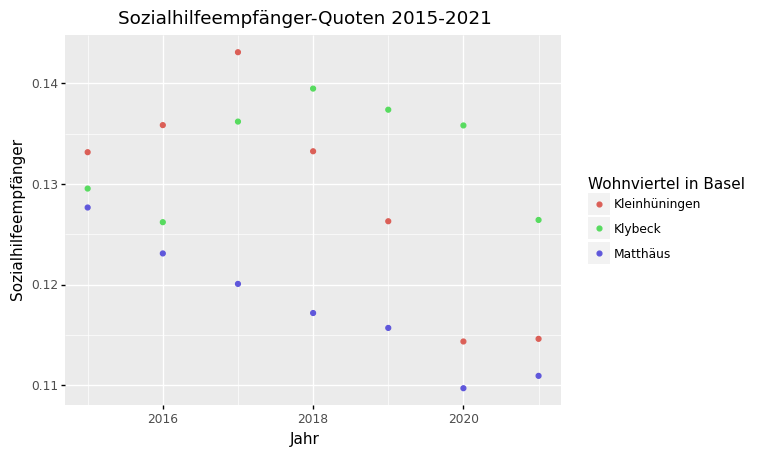

<ggplot: (145950304226)>

In [114]:
#Vergleich der 3 Quartiere mit den grössten Sozialhilfeempfängern über die Jahre simples Plot
# Auffällig hierbei ist, wie bei dem Quartier Matthäus die Sozialhilfeempfänger-Quote kontinuierlich sinken bei genaueren Untersuchungen, 
# könnte man mithilfe einer Linearen Regression die Zahlen in den nächsten Jahren voraussagen. Jedoch höchstens 1-3 Jahre, denn ab dann wir es nicht mehr Linear sinken.
(plotnine.qplot(x= 'Jahr',y='Sozialhilfeempfänger', data= df_top3, color= 'Wohnviertel in Basel', main='Sozialhilfeempfänger-Quoten 2015-2021'))

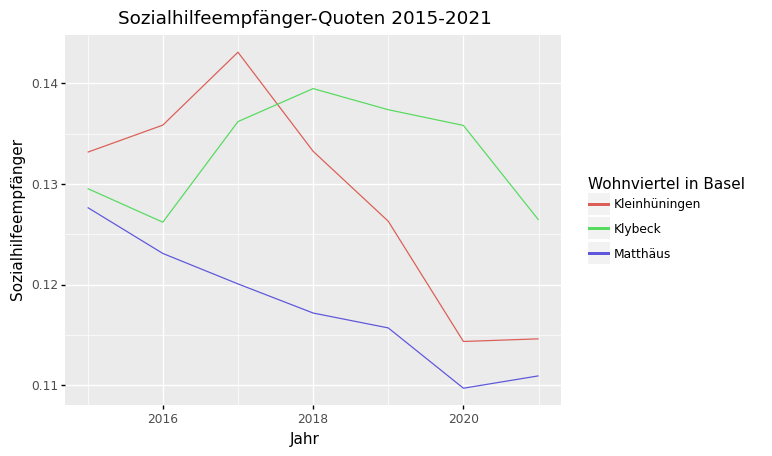

<ggplot: (145952698768)>

In [122]:
line_plot = ggplot(mapping = aes(x= 'Jahr',y='Sozialhilfeempfänger', color= 'Wohnviertel in Basel'), data= df_top3)

(line_plot + plotnine.geom_line()+ plotnine.labs(title='Sozialhilfeempfänger-Quoten 2015-2021') )

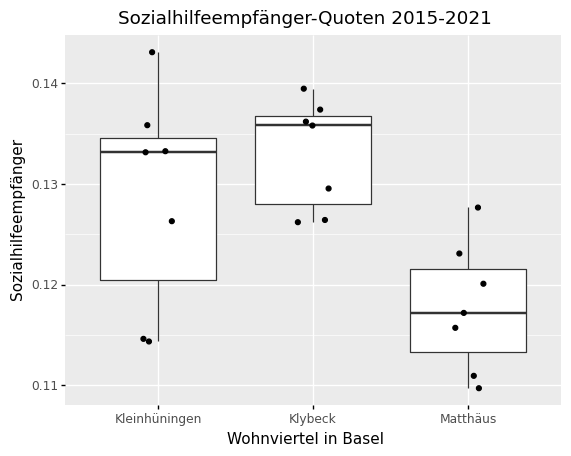

<ggplot: (145950589379)>

In [116]:
'''In einem Boxplotdiagramm sehen wir sehr schön wie gross die unterschiedlichen Minimal und Maximal-Werte. Zudem ist gleich ersichtlich, dass in unseren Sozialhilfeempfänger-Daten 
keine Extrempunkte vorhanden sind. Leider sehen wir nicht wie sich die Sozialhilfeempfänger-Quote entwickelt hat und wo si momentan steht.'''
(ggplot(data=df_top3, mapping=aes(x='Wohnviertel in Basel', y='Sozialhilfeempfänger')) +
 plotnine.geom_boxplot() + plotnine.labs(title='Sozialhilfeempfänger-Quoten 2015-2021') +
 plotnine.geom_jitter(position=plotnine.position_jitter(0.1), color= 'black'))



In [117]:
 #Zur Kontrolle der Boxplots
matthäus.Sozialhilfeempfänger.max(), matthäus.Sozialhilfeempfänger.min(), matthäus.Sozialhilfeempfänger.median()

(0.1276765937, 0.1097258486, 0.1171948838)

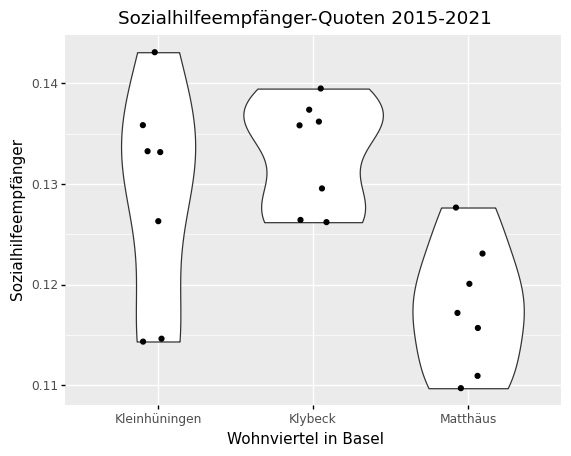

<ggplot: (145950489862)>

In [118]:
#Violinplot
violin_plot = ggplot(data=df_top3, mapping=aes(x='Wohnviertel in Basel', y='Sozialhilfeempfänger'))

(violin_plot + plotnine.geom_violin() + plotnine.labs(title='Sozialhilfeempfänger-Quoten 2015-2021') +
plotnine.geom_jitter(position=plotnine.position_jitter(0.1), color= 'black'))

In [128]:
bar_diagramm = px.bar(df, x= 'Wohnviertel in Basel', y = 'Sozialhilfeempfänger', width= 600, height=600, title= 'Verteilung Sozialhilfeempfänger 2021' )
bar_diagramm

In [130]:
bar_diagramm = px.bar(df, x= 'Wohnviertel in Basel', y = 'Sozialhilfeempfänger', width= 600, height=600, title= 'Verteilung Sozialhilfeempfänger 2021 Logarithmische y-Achse', log_y= True )
bar_diagramm

## LE 5

In [119]:
experiment1 = pd.DataFrame(
    {
        'id' : [0,0,1,1],
        'Diagramm-typ' : ['Scatter plot','Scatter plot', 'Line plot','Line plot'],
        'Zeiten' : [12.44,10.81,5.38,5.07]
}
)
px.histogram(experiment1, x='Diagramm-typ', y='Zeiten',color= 'Diagramm-typ', title= 'Vergleich 1 Versuchsgruppen Zeiten', width = 600)

In [120]:
experiment2 = pd.DataFrame(
    {
        'id' : [0,0,1,1],
        'Diagramm-typ' : ['Boxplot','Boxplot','Line plot','Line plot'],
        'Zeiten' : [5.28,6.91,7.65,9.34]
}
)
px.histogram(experiment2, x='Diagramm-typ', y='Zeiten',color= 'Diagramm-typ', title= 'Vergleich 2 Versuchsgruppen Zeiten', width = 600)